In [132]:
# Dependencies and Setup
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt

# File to Load
file_to_load = "./Resources/MoviesOnStreamingPlatforms_updated.csv"

# Read Purchasing File and store into Pandas data frame
csv = pd.read_csv(file_to_load, engine='python')
csv.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [133]:
moviecount = (len(csv))
moviecount

16744

In [134]:
newdata = csv[(csv['Year'] > 2009) & (csv['Year'] < 2019)]
newdata

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
5,5,6,Spider-Man: Into the Spider-Verse,2018,7+,8.4,97%,1,0,0,0,0,"Bob Persichetti,Peter Ramsey,Rodney Rothman","Animation,Action,Adventure,Family,Sci-Fi",United States,"English,Spanish",117.0
7,7,8,Django Unchained,2012,18+,8.4,87%,1,0,0,0,0,Quentin Tarantino,"Drama,Western",United States,"English,German,French,Italian",165.0
13,13,14,Room,2015,18+,8.1,93%,1,0,0,0,0,Lenny Abrahamson,"Drama,Thriller","Ireland,Canada,United Kingdom,United States",English,118.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16733,16733,16734,Sea of Hope: America's Underwater Treasures,2017,NaN,7.3,NaN,0,0,0,1,0,Robert Nixon,Documentary,United States,English,48.0
16735,16735,16736,Secrets of the King Cobra,2010,NaN,6.4,NaN,0,0,0,1,0,NaN,Documentary,India,English,NaN
16736,16736,16737,Winged Seduction: Birds of Paradise,2012,NaN,6.5,NaN,0,0,0,1,0,Molly Hermann,Documentary,United States,English,NaN
16741,16741,16742,Sharks of Lost Island,2013,NaN,5.7,NaN,0,0,0,1,0,Neil Gelinas,Documentary,United States,English,NaN


## Which streaming platform has the greatest number of popular movies? 

## Netflix: Rotten Tomatoes

In [135]:

RTrating = newdata[('Rotten Tomatoes')].sort_values()
RT2 = RTrating.dropna(how = 'any')
RTdf = pd.DataFrame(newdata[['Netflix','Rotten Tomatoes', 'Title']])
RTdf.dropna(inplace=True)
RTdf = RTdf[RTdf.Netflix != 0]
RTdf

,Netflix,Rotten Tomatoes,Title
0,1,87%,Inception
2,1,84%,Avengers: Infinity War
5,1,97%,Spider-Man: Into the Spider-Verse
7,1,87%,Django Unchained
13,1,93%,Room
...,...,...,...
3230,1,60%,Garbage
3332,1,40%,Mantostaan
3365,1,20%,The Price of Success
3430,1,40%,Mantra


In [136]:
RTdf.to_csv("Resources/netflix.csv")

In [137]:
netflix = pd.read_csv("Resources/netflix.csv")


In [146]:
netflix["Rotten Tomatoes"] = netflix["Rotten Tomatoes"].str.replace('%', "")

In [147]:
netflix["Rotten Tomatoes"] = pd.to_numeric(netflix["Rotten Tomatoes"])

netflix["Rotten Tomatoes"].dtypes

dtype('int64')

In [148]:
RTrating = netflix[('Rotten Tomatoes')].sort_values()
RT2 = RTrating.dropna(how = 'any')
RTdf = pd.DataFrame(netflix[['Netflix','Rotten Tomatoes', 'Title']])
RTdf.dropna(inplace=True)
RTdf = RTdf[RTdf.Netflix != 0]
RTdf

,Netflix,Rotten Tomatoes,Title
0,1,87,Inception
1,1,84,Avengers: Infinity War
2,1,97,Spider-Man: Into the Spider-Verse
3,1,87,Django Unchained
4,1,93,Room
...,...,...,...
966,1,60,Garbage
967,1,40,Mantostaan
968,1,20,The Price of Success
969,1,40,Mantra


In [149]:
# Make bins based on Percentages

bins = [0, 20, 40, 60,80, 100]
percentages = ["Terrible", "Fair", "Good", "Great", "Awesome"]
netflix["Rotten Tomatoes Label"] = pd.cut(netflix["Rotten Tomatoes"], bins, labels= percentages, include_lowest=True)

netflix.head()

,Unnamed: 0,Netflix,Rotten Tomatoes,Title,Rotten Tomatoes Label
0,0,1,87,Inception,Awesome
1,2,1,84,Avengers: Infinity War,Awesome
2,5,1,97,Spider-Man: Into the Spider-Verse,Awesome
3,7,1,87,Django Unchained,Awesome
4,13,1,93,Room,Awesome


In [150]:
netflixbar = netflix.groupby("Rotten Tomatoes Label")
netflixbar2 = netflixbar["Netflix"].count()

Text(0, 0.5, 'Number of Movies')

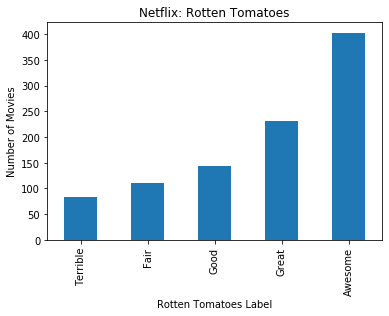

In [151]:
netflixbar2.plot.bar()

plt.title("Netflix: Rotten Tomatoes")
plt.xlabel("Rotten Tomatoes Label")
plt.ylabel("Number of Movies")


## Hulu: Rotten Tomatoes

In [152]:

RThulurating = newdata[('Rotten Tomatoes')].sort_values()
RThulu2 = RThulurating.dropna(how = 'any')
RThuludf = pd.DataFrame(newdata[['Hulu','Rotten Tomatoes', 'Title']])
RThuludf.dropna(inplace=True)
RThuludf = RThuludf[RThuludf.Hulu != 0]
RThuludf

,Hulu,Rotten Tomatoes,Title
67,1,98%,Blackfish
97,1,99%,Jiro Dreams of Sushi
148,1,100%,The Square
285,1,100%,Hey Arnold! The Jungle Movie
340,1,52%,The Interview
...,...,...,...
4320,1,15%,Let's Be Evil
4327,1,50%,Julian Schnabel: A Private Portrait
4338,1,72%,This One's for the Ladies
4344,1,4%,Beneath the Darkness


In [154]:
RThuludf.to_csv("Resources/hulu.csv")

hulu = pd.read_csv("Resources/hulu.csv")


hulu["Rotten Tomatoes"] = hulu["Rotten Tomatoes"].str.replace('%', "")

hulu["Rotten Tomatoes"] = pd.to_numeric(hulu["Rotten Tomatoes"])

hulu["Rotten Tomatoes"].dtypes

dtype('int64')

In [159]:
RThulurating = hulu[('Rotten Tomatoes')].sort_values()
RThulu2 = RThulurating.dropna(how = 'any')
RThuludf = pd.DataFrame(hulu[['Hulu','Rotten Tomatoes', 'Title']])
RThuludf.dropna(inplace=True)
RThuludf = RThuludf[RThuludf.Hulu != 0]
RThuludf

,Hulu,Rotten Tomatoes,Title
0,1,98,Blackfish
1,1,99,Jiro Dreams of Sushi
2,1,100,The Square
3,1,100,Hey Arnold! The Jungle Movie
4,1,52,The Interview
...,...,...,...
405,1,15,Let's Be Evil
406,1,50,Julian Schnabel: A Private Portrait
407,1,72,This One's for the Ladies
408,1,4,Beneath the Darkness


In [160]:
# Make bins based on Percentages

bins = [0, 20, 40, 60,80, 100]
percentages = ["Terrible", "Fair", "Good", "Great", "Awesome"]
hulu["Rotten Tomatoes Label"] = pd.cut(hulu["Rotten Tomatoes"], bins, labels= percentages, include_lowest=True)

hulu.head()

,Unnamed: 0,Hulu,Rotten Tomatoes,Title,Rotten Tomatoes Label
0,67,1,98,Blackfish,Awesome
1,97,1,99,Jiro Dreams of Sushi,Awesome
2,148,1,100,The Square,Awesome
3,285,1,100,Hey Arnold! The Jungle Movie,Awesome
4,340,1,52,The Interview,Good


In [161]:
hulubar = hulu.groupby("Rotten Tomatoes Label")
hulubar2 = hulubar["Hulu"].count()

Text(0, 0.5, 'Number of Movies')

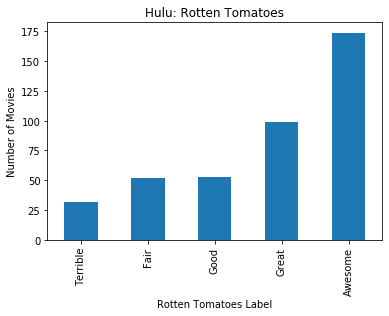

In [162]:
hulubar2.plot.bar()

plt.title("Hulu: Rotten Tomatoes")
plt.xlabel("Rotten Tomatoes Label")
plt.ylabel("Number of Movies")


## Disney+: Rotten Tomatoes

In [175]:
RTdisneyrating = newdata[('Rotten Tomatoes')].sort_values()
RTdisney2 = RTdisneyrating.dropna(how = 'any')
RTdisneydf = pd.DataFrame(newdata[['Disney+','Rotten Tomatoes', 'Title']])
RTdisneydf.dropna(inplace=True)
RTdisneydf = RTdisneydf[RTdisneydf["Disney+"] != 0]
RTdisneydf

,Disney+,Rotten Tomatoes,Title
95,1,79%,Saving Mr. Banks
103,1,95%,Amy
482,1,88%,White Fang
1761,1,20%,The Little Mermaid
3580,1,97%,Free Solo
...,...,...,...
16480,1,100%,Marvel Rising: Secret Warriors
16481,1,37%,Mars Needs Moms
16482,1,60%,Sharpay's Fabulous Adventure
16515,1,36%,Prom


In [178]:
RTdisneydf.to_csv("Resources/disney.csv")

disney = pd.read_csv("Resources/disney.csv")


disney["Rotten Tomatoes"] = disney["Rotten Tomatoes"].str.replace('%', "")

disney["Rotten Tomatoes"] = pd.to_numeric(disney["Rotten Tomatoes"])

disney["Rotten Tomatoes"].dtypes

dtype('int64')

In [182]:
RTdisneyrating = disney[('Rotten Tomatoes')].sort_values()
RTdisney2 = RTdisneyrating.dropna(how = 'any')
RTdisneydf = pd.DataFrame(disney[['Disney+','Rotten Tomatoes', 'Title']])
RTdisneydf.dropna(inplace=True)
RTdisneydf = RTdisneydf[RTdisneydf["Disney+"] != 0]
RTdisneydf

,Disney+,Rotten Tomatoes,Title
0,1,79,Saving Mr. Banks
1,1,95,Amy
2,1,88,White Fang
3,1,20,The Little Mermaid
4,1,97,Free Solo
...,...,...,...
69,1,100,Marvel Rising: Secret Warriors
70,1,37,Mars Needs Moms
71,1,60,Sharpay's Fabulous Adventure
72,1,36,Prom


In [183]:
# Make bins based on Percentages

bins = [0, 20, 40, 60,80, 100]
percentages = ["Terrible", "Fair", "Good", "Great", "Awesome"]
disney["Rotten Tomatoes Label"] = pd.cut(disney["Rotten Tomatoes"], bins, labels= percentages, include_lowest=True)

disney.head()

,Unnamed: 0,Disney+,Rotten Tomatoes,Title,Rotten Tomatoes Label
0,95,1,79,Saving Mr. Banks,Great
1,103,1,95,Amy,Awesome
2,482,1,88,White Fang,Awesome
3,1761,1,20,The Little Mermaid,Terrible
4,3580,1,97,Free Solo,Awesome


In [184]:
disneybar = disney.groupby("Rotten Tomatoes Label")
disneybar2 = disneybar["Disney+"].count()

Text(0, 0.5, 'Number of Movies')

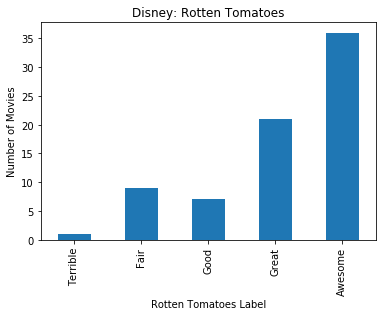

In [185]:
disneybar2.plot.bar()

plt.title("Disney: Rotten Tomatoes")
plt.xlabel("Rotten Tomatoes Label")
plt.ylabel("Number of Movies")


## Amazon Prime Video: Rotten Tomatoes

In [190]:
RTamazonrating = newdata[('Rotten Tomatoes')].sort_values()
RTamazon2 = RTamazonrating.dropna(how = 'any')
RTamazondf = pd.DataFrame(newdata[['Prime Video','Rotten Tomatoes', 'Title']])
RTamazondf.dropna(inplace=True)
RTamazondf = RTamazondf[RTamazondf["Prime Video"] != 0]
RTamazondf

,Prime Video,Rotten Tomatoes,Title
31,1,92%,Drive
32,1,94%,Train to Busan
103,1,95%,Amy
142,1,99%,Starred Up
148,1,100%,The Square
...,...,...,...
15269,1,20%,Northeast
15625,1,50%,You Don't Need Feet to Dance
15669,1,13%,The Man On Her Mind
15671,1,14%,Double Trouble


In [191]:
RTamazondf.to_csv("Resources/amazon.csv")

amazon = pd.read_csv("Resources/amazon.csv")


amazon["Rotten Tomatoes"] = amazon["Rotten Tomatoes"].str.replace('%', "")

amazon["Rotten Tomatoes"] = pd.to_numeric(amazon["Rotten Tomatoes"])

amazon["Rotten Tomatoes"].dtypes

dtype('int64')

In [192]:
RTamazonrating = amazon[('Rotten Tomatoes')].sort_values()
RTamazon2 = RTamazonrating.dropna(how = 'any')
RTamazondf = pd.DataFrame(amazon[['Prime Video','Rotten Tomatoes', 'Title']])
RTamazondf.dropna(inplace=True)
RTamazondf = RTamazondf[RTamazondf["Prime Video"] != 0]
RTamazondf

,Prime Video,Rotten Tomatoes,Title
0,1,92,Drive
1,1,94,Train to Busan
2,1,95,Amy
3,1,99,Starred Up
4,1,100,The Square
...,...,...,...
1641,1,20,Northeast
1642,1,50,You Don't Need Feet to Dance
1643,1,13,The Man On Her Mind
1644,1,14,Double Trouble


In [194]:
# Make bins based on Percentages

bins = [0, 20, 40, 60,80, 100]
percentages = ["Terrible", "Fair", "Good", "Great", "Awesome"]
amazon["Rotten Tomatoes Label"] = pd.cut(amazon["Rotten Tomatoes"], bins, labels= percentages, include_lowest=True)

amazon.head()

,Unnamed: 0,Prime Video,Rotten Tomatoes,Title,Rotten Tomatoes Label
0,31,1,92,Drive,Awesome
1,32,1,94,Train to Busan,Awesome
2,103,1,95,Amy,Awesome
3,142,1,99,Starred Up,Awesome
4,148,1,100,The Square,Awesome


In [195]:
amazonbar = amazon.groupby("Rotten Tomatoes Label")
amazonbar2 = amazonbar["Prime Video"].count()

Text(0, 0.5, 'Number of Movies')

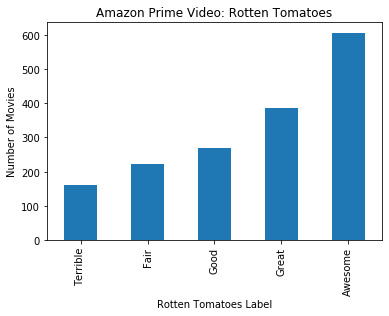

In [197]:
amazonbar2.plot.bar()

plt.title("Amazon Prime Video: Rotten Tomatoes")
plt.xlabel("Rotten Tomatoes Label")
plt.ylabel("Number of Movies")
